In [1]:
# Import 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import datetime as dt




### 1. CLEANING: 
Uploading CSVs and obtaining/adressing basic information such as missing values and object types

In [2]:
# Import demographic data
users = pd.read_csv('takehome_users.csv', encoding='latin1')  

# Import user engagement data
engagement = pd.read_csv('takehome_user_engagement.csv')

print(users.head())



print(users.info())

   object_id        creation_time               name  \
0          1  2014-04-22 03:53:30     Clausen August   
1          2  2013-11-15 03:45:04      Poole Matthew   
2          3  2013-03-19 23:14:52  Bottrill Mitchell   
3          4  2013-05-21 08:09:28    Clausen Nicklas   
4          5  2013-01-17 10:14:20          Raw Grace   

                        email creation_source  last_session_creation_time  \
0    AugustCClausen@yahoo.com    GUEST_INVITE                1.398139e+09   
1      MatthewPoole@gustr.com      ORG_INVITE                1.396238e+09   
2  MitchellBottrill@gustr.com      ORG_INVITE                1.363735e+09   
3   NicklasSClausen@yahoo.com    GUEST_INVITE                1.369210e+09   
4          GraceRaw@yahoo.com    GUEST_INVITE                1.358850e+09   

   opted_in_to_mailing_list  enabled_for_marketing_drip  org_id  \
0                         1                           0      11   
1                         0                           0       1   

In [3]:
# Types for each column
print(users.dtypes)


object_id                       int64
creation_time                  object
name                           object
email                          object
creation_source                object
last_session_creation_time    float64
opted_in_to_mailing_list        int64
enabled_for_marketing_drip      int64
org_id                          int64
invited_by_user_id            float64
dtype: object


In [4]:
print(users.head())

   object_id        creation_time               name  \
0          1  2014-04-22 03:53:30     Clausen August   
1          2  2013-11-15 03:45:04      Poole Matthew   
2          3  2013-03-19 23:14:52  Bottrill Mitchell   
3          4  2013-05-21 08:09:28    Clausen Nicklas   
4          5  2013-01-17 10:14:20          Raw Grace   

                        email creation_source  last_session_creation_time  \
0    AugustCClausen@yahoo.com    GUEST_INVITE                1.398139e+09   
1      MatthewPoole@gustr.com      ORG_INVITE                1.396238e+09   
2  MitchellBottrill@gustr.com      ORG_INVITE                1.363735e+09   
3   NicklasSClausen@yahoo.com    GUEST_INVITE                1.369210e+09   
4          GraceRaw@yahoo.com    GUEST_INVITE                1.358850e+09   

   opted_in_to_mailing_list  enabled_for_marketing_drip  org_id  \
0                         1                           0      11   
1                         0                           0       1   



SUMMARY:
    
- 10 Columns
    
- Missing values in "last_session_creation_time"
    
- Missing values in "invited_by_user_id"

In [5]:
#Adressing "last_session_creation_time" by converting to date dt and addressing NaN values

# Convert 'last_session_creation_time' to numeric
users['last_session_creation_time'] = pd.to_numeric(users['last_session_creation_time'], errors='coerce')

# Check for NaN values
nan_count = users['last_session_creation_time'].isna().sum()
print(f"There are {nan_count} NaN values in last_session_creation_time.")

# Handle NaN values
# Fill NaN values with corresponding creation_time because we assume that the users with NaN values have not engaged with the product
# Convert 'creation_time' to Unix timestamp for filling
users['creation_time'] = pd.to_datetime(users['creation_time'])
users['creation_time'] = users['creation_time'].astype('int64') // 10**9  # Convert to Unix timestamp

# Fill NaN values in 'last_session_creation_time' with 'creation_time
users['last_session_creation_time'] = users['last_session_creation_time'].fillna(users['creation_time'])

# Check the updated column for any remaining NaN values
nan_count_after_fill = users['last_session_creation_time'].isna().sum()
print(f"There are now {nan_count_after_fill} NaN values in last_session_creation_time after filling.")

# Convert 'last_session_creation_time' from Unix timestamp to datetime
users['last_session_creation_time'] = pd.to_datetime(users['last_session_creation_time'], unit='s')

# Verify the data types
print(users.dtypes)



There are 3177 NaN values in last_session_creation_time.
There are now 0 NaN values in last_session_creation_time after filling.
object_id                              int64
creation_time                          int64
name                                  object
email                                 object
creation_source                       object
last_session_creation_time    datetime64[ns]
opted_in_to_mailing_list               int64
enabled_for_marketing_drip             int64
org_id                                 int64
invited_by_user_id                   float64
dtype: object


In [6]:
#Creating a new column that stores the exact date that each account was created

users['creation_time'] = pd.to_datetime(users['creation_time'], errors='coerce')

# Create a new column for just the date (YYYY-MM-DD)
users['creation_date'] = users['creation_time'].dt.date



In [7]:
print(users.head())

   object_id                 creation_time               name  \
0          1 1970-01-01 00:00:01.398138810     Clausen August   
1          2 1970-01-01 00:00:01.384487104      Poole Matthew   
2          3 1970-01-01 00:00:01.363734892  Bottrill Mitchell   
3          4 1970-01-01 00:00:01.369123768    Clausen Nicklas   
4          5 1970-01-01 00:00:01.358417660          Raw Grace   

                        email creation_source last_session_creation_time  \
0    AugustCClausen@yahoo.com    GUEST_INVITE        2014-04-22 03:53:30   
1      MatthewPoole@gustr.com      ORG_INVITE        2014-03-31 03:45:04   
2  MitchellBottrill@gustr.com      ORG_INVITE        2013-03-19 23:14:52   
3   NicklasSClausen@yahoo.com    GUEST_INVITE        2013-05-22 08:09:28   
4          GraceRaw@yahoo.com    GUEST_INVITE        2013-01-22 10:14:20   

   opted_in_to_mailing_list  enabled_for_marketing_drip  org_id  \
0                         1                           0      11   
1                 

In [8]:
# Addressing missing values from 'invited_by_user_id' column

# Check for NaN values
nan_count = users['invited_by_user_id'].isna().sum()
print(f"There are {nan_count} NaN values in invited_by_user_id.")


There are 5583 NaN values in invited_by_user_id.


5583 is a significat amount that cannot be ignored or dropped. It is reasonable to believe that the missing values in this column represent users who were not invited by anyone. We can address this problem by filling in the missing values with "0". A zero will signify that the user does not have a corresponding invitation from someone else. 

In [9]:
# Use .loc to fill missing values with 0
users.loc[users['invited_by_user_id'].isna(), 'invited_by_user_id'] = 0




print(users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  12000 non-null  datetime64[ns]
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          12000 non-null  float64       
 10  creation_date               12000 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(4), object(4)


SUMMARY:

The "takehome_users.csv" is now clean. I did this by ensuring that all data types were consistent and in the correct format. 

-The "last_session_creation_time" column was converted to dt

-Missing values in "last_session_creation" were converted to their corresponding "creation_time" because we can assume that these users have not used this product with the exception of when they created the account. 

-The invited_by_uswer_id column had a significant amount of missing values that were corrected by assigning the missing values to "0". We can assume that the values were missing because these users did not recieve an invitation by another user. 

-A new column was created that corresponds to the exact date that each account was created. This could provide beneficial insight to if time that accounts were created have a correlation to user engagement. 

In [10]:
# Reviewing the information in the "takehome_user_engagement.csv"

# Types for each column
print(engagement.dtypes)

time_stamp    object
user_id        int64
visited        int64
dtype: object


In [11]:
print(engagement.head())

            time_stamp  user_id  visited
0  2014-04-22 03:53:30        1        1
1  2013-11-15 03:45:04        2        1
2  2013-11-29 03:45:04        2        1
3  2013-12-09 03:45:04        2        1
4  2013-12-25 03:45:04        2        1


In [12]:
print(engagement.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB
None


SUMMARY: 

- There are no missing values in the data 

- The "time_stamp" column is an object but should be converted to dt

In [13]:
engagement['time_stamp'] = pd.to_datetime(engagement['time_stamp'])

print(engagement.info())

print(engagement.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB
None
           time_stamp  user_id  visited
0 2014-04-22 03:53:30        1        1
1 2013-11-15 03:45:04        2        1
2 2013-11-29 03:45:04        2        1
3 2013-12-09 03:45:04        2        1
4 2013-12-25 03:45:04        2        1


SUMMARY

- The user engagement csv is clean without missing values and the time_stamp column has been converted to date time.


### 2. EXPLORATORY DATA ANALYSIS

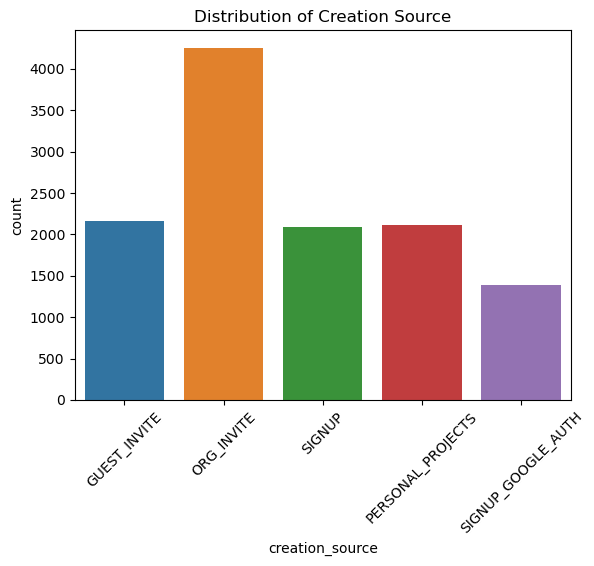

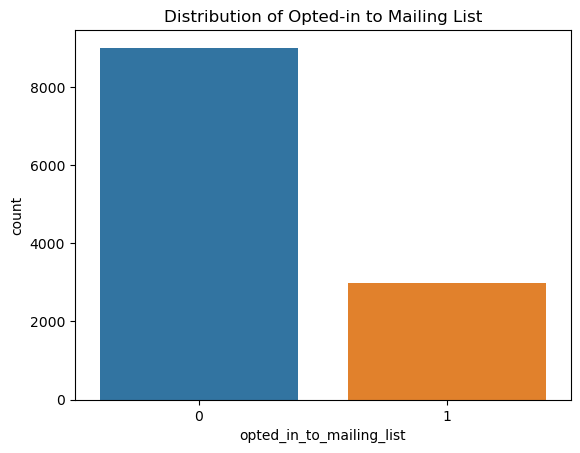

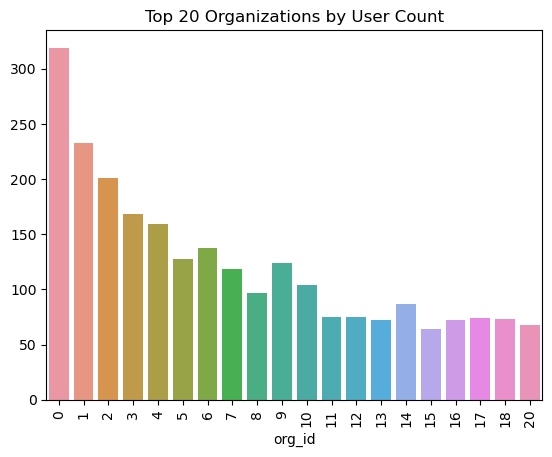

In [14]:
# Distribution of 'creation_source'
sns.countplot(x='creation_source', data=users)
plt.xticks(rotation=45)
plt.title('Distribution of Creation Source')
plt.show()

# Distribution of 'opted_in_to_mailing_list'
sns.countplot(x='opted_in_to_mailing_list', data=users)
plt.title('Distribution of Opted-in to Mailing List')
plt.show()

# Distribution of 'org_id' (top 20 organizations by count)
top_orgs = users['org_id'].value_counts().nlargest(20)
sns.barplot(x=top_orgs.index, y=top_orgs.values)
plt.xticks(rotation=90)
plt.title('Top 20 Organizations by User Count')
plt.show()

In [15]:
# Group by 'org_id' and count the number of users in each organization
user_counts_by_org = users.groupby('org_id').size()

# Calculate the median number of users
median_users = user_counts_by_org.median()

# Output the median
print(f"The median number of users by organization ID is: {median_users}")

The median number of users by organization ID is: 22.0


SUMMARY: 

- About 4000 of the 12000 users signed up via Organization Invite which was the dominate way that users signed up. 

- 300 users opted into the mailing list. Whereas 9000 users opted out of it.  

- Organization with id "0" had the highest user count with over 300 users despite the median number of users per ALL organizations being 22. 

In [16]:
# Merging the two data frames on user_id

#  Merge the DataFrames on the user ID
combined_df = pd.merge(users, engagement, left_on='object_id', right_on='user_id', how='inner')


# Display the combined DataFrame
print(combined_df.head())


   object_id                 creation_time            name  \
0          1 1970-01-01 00:00:01.398138810  Clausen August   
1          2 1970-01-01 00:00:01.384487104   Poole Matthew   
2          2 1970-01-01 00:00:01.384487104   Poole Matthew   
3          2 1970-01-01 00:00:01.384487104   Poole Matthew   
4          2 1970-01-01 00:00:01.384487104   Poole Matthew   

                      email creation_source last_session_creation_time  \
0  AugustCClausen@yahoo.com    GUEST_INVITE        2014-04-22 03:53:30   
1    MatthewPoole@gustr.com      ORG_INVITE        2014-03-31 03:45:04   
2    MatthewPoole@gustr.com      ORG_INVITE        2014-03-31 03:45:04   
3    MatthewPoole@gustr.com      ORG_INVITE        2014-03-31 03:45:04   
4    MatthewPoole@gustr.com      ORG_INVITE        2014-03-31 03:45:04   

   opted_in_to_mailing_list  enabled_for_marketing_drip  org_id  \
0                         1                           0      11   
1                         0                     

In [17]:
# Create a new column for the week
combined_df['week'] = combined_df['last_session_creation_time'].dt.to_period('W').astype(str)

# Count total visits per user per week
weekly_visits = combined_df.groupby(['user_id', 'week']).size().reset_index(name='visit_count')

# Identify adopted users (those with 3 or more visits in a week)
adopted_users = weekly_visits[weekly_visits['visit_count'] >= 3]

# Get unique user IDs of adopted users
adopted_user_ids = adopted_users['user_id'].unique()

# Create a DataFrame for adopted users 
adopted_users_df = combined_df[combined_df['user_id'].isin(adopted_user_ids)].drop_duplicates(subset='user_id')

print(adopted_users_df.columns)


# Get the number of rows in adopted_users_df using len()
num_rows = len(adopted_users_df)
print(f"Number of rows in adopted_users_df: {num_rows}")


Index(['object_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id',
       'creation_date', 'time_stamp', 'user_id', 'visited', 'week'],
      dtype='object')
Number of rows in adopted_users_df: 2248


SUMMARY: 

- There are 2248 ADOPTED USERS out of the 12000 users


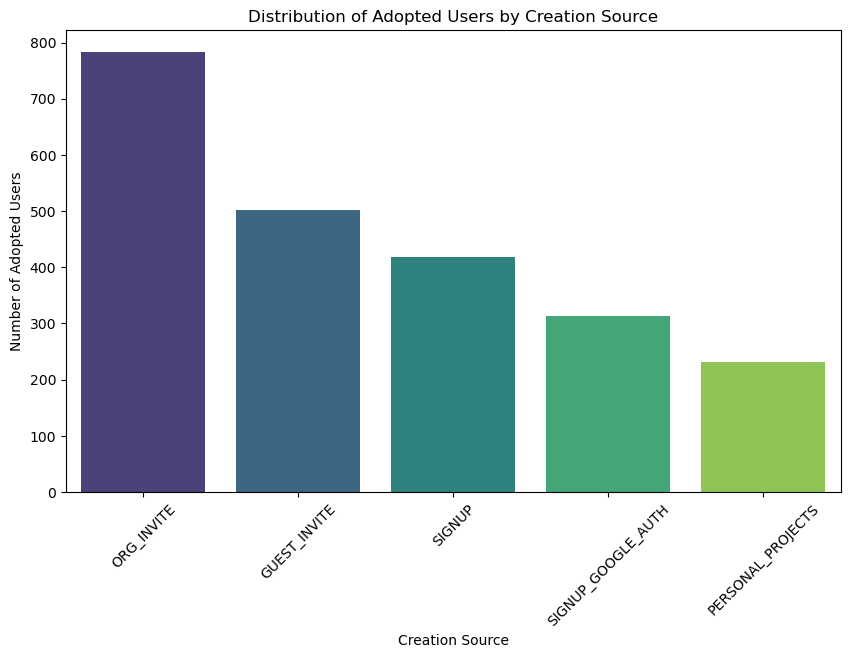

In [18]:

# Count the number of adopted users by creation source
creation_source_counts = adopted_users_df['creation_source'].value_counts()

# Plotting the distribution of adopted users by creation source
plt.figure(figsize=(10, 6))
sns.barplot(x=creation_source_counts.index, y=creation_source_counts.values, palette='viridis')
plt.title('Distribution of Adopted Users by Creation Source')
plt.xlabel('Creation Source')
plt.ylabel('Number of Adopted Users')
plt.xticks(rotation=45)
plt.show()


Most of the adopted users joined via Organization Invite. 

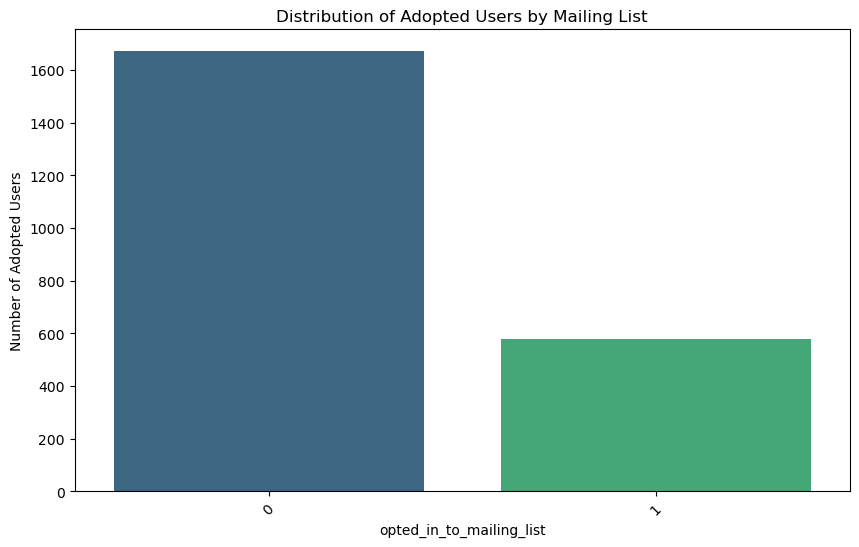

In [19]:
# Count the number of adopted users by mailing list
mailing_list_counts = adopted_users_df['opted_in_to_mailing_list'].value_counts()

# Plotting the distribution of adopted users by mailing list
plt.figure(figsize=(10, 6))
sns.barplot(x=mailing_list_counts.index, y=mailing_list_counts.values, palette='viridis')
plt.title('Distribution of Adopted Users by Mailing List')
plt.xlabel('opted_in_to_mailing_list')
plt.ylabel('Number of Adopted Users')
plt.xticks(rotation=45)
plt.show()


The majority of adopted users do NOT opt into the mailing list. 

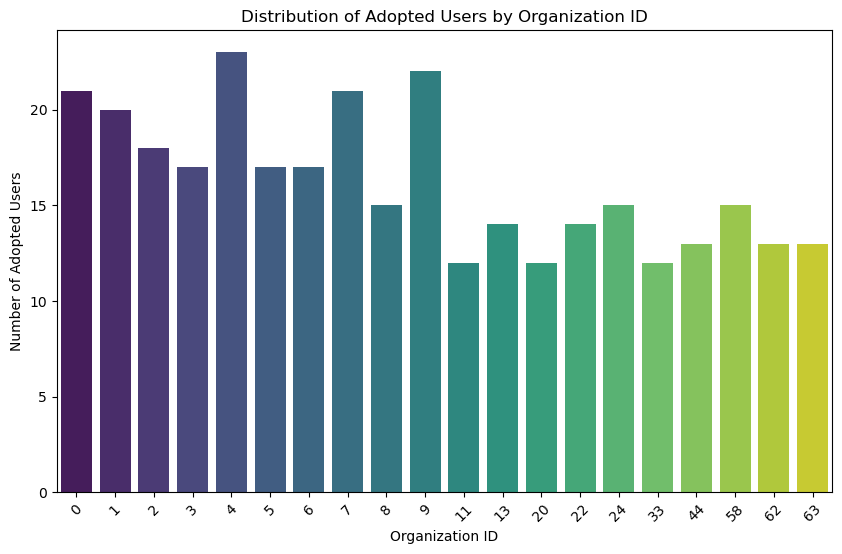

In [20]:
# Count the number of adopted users by organization ID
org_id_counts = adopted_users_df['org_id'].value_counts().nlargest(20)

# Plotting the distribution of adopted users by organization ID
plt.figure(figsize=(10, 6))
sns.barplot(x=org_id_counts.index, y=org_id_counts.values, palette='viridis')
plt.title('Distribution of Adopted Users by Organization ID')
plt.xlabel('Organization ID')
plt.ylabel('Number of Adopted Users')
plt.xticks(rotation=45)
plt.show()




In [21]:
# Group by 'org_id' and count the number of adopted users in each organization
adopted_user_counts_by_org = users.groupby('org_id').size()

# Calculate the median number of users
adopted_median_users = adopted_user_counts_by_org.median()

# Output the median
print(f"The median number of users by organization ID is: {median_users}")

The median number of users by organization ID is: 22.0


In [ ]:
#### Count adopted users by organization
adopted_user_counts = adopted_users_df['org_id'].value_counts()

# Get the top 20 organizations with the most adopted users
top_20_orgs = adopted_user_counts.head(20)

#  Calculate the median number of adopted users in the top 20 organizations
median_adopted_users = top_20_orgs.median()

# Display the results
print("Top 20 Organizations with Adopted Users:")
print(top_20_orgs)
print(f"\nMedian number of adopted users in the top 20 organizations: {median_adopted_users}")


### DISCUSSION:


In this take-home challenge, I initiated the analysis by importing the necessary libraries and CSV files, setting the groundwork for an insightful exploration of user engagement data. Upon visualizing the data, I observed ten key columns, including significant missing values in the last_session_creation_time and invited_by_user_id columns.

To address the missing values in last_session_creation_time, I made the assumption that users with no recorded session creation time had only engaged with the product at the time of their account creation. Consequently, I filled these missing values with the corresponding creation_time. This approach allowed us to retain relevant information while acknowledging that these users may not have utilized the product extensively after account creation.

For the invited_by_user_id column, I encountered a substantial amount of missing data, which I addressed by assigning missing values to 0. This adjustment was based on the assumption that users without an invitation did not receive a referral from another user, providing a clearer understanding of user acquisition channels.

Additionally, I created a new column that captured the exact date of account creation. This enhancement opens up avenues for further analysis, particularly regarding the correlation between account creation dates and user engagement levels over time. Understanding this relationship could yield valuable insights into user retention strategies.

In examining the user engagement CSV, I found no missing values, but I did identify that the time_stamp column was in object format.

Next, I combined the two DataFrames, users and engagement, to create a new DataFrame (combined_df). This allowed for a deeper segmentation of data by week, enabling the identification of "adopted users"—those who logged in on three separate days within a seven-day period. This analysis was pivotal in understanding user behavior and engagement patterns.

From the resulting adopted_users DataFrame, I further explored the distribution of adopted users based on creation source, mailing list subscription, and the top 20 organizations. This exploration helped uncover potential factors influencing user adoption and engagement within the platform.

### CONCLUSION:


Through the exploration of the data, I identified a total of 2,248 adopted users out of the 12,000 total users. These adopted users, defined by their frequent engagement with the platform, were predominantly invited by their respective organizations and tended to opt out of the mailing list. In fact, most users, in general, opted out of the mailing list, indicating that email marketing may not be an effective method for converting users into highly engaged or "adopted" users.

Among the adopted users, I observed that the top 20 organizations (ranked by adopted user count), had a median of approximately 15 adopted users, with the highest-performing organization boasting over 300 adopted users. This significant variation suggests that organizational influence and company culture play a large role in driving higher levels of user engagement.

In conclusion, the data indicates that organizational initiatives and possibly internal culture are key drivers for reaching the adopted user level of engagement, whereas strategies like email marketing appear to have minimal impact. Future efforts to increase user adoption should focus on enhancing organizational onboarding and engagement strategies rather than relying on mailing lists.